 # AIRLINE CONSUMER SATISFACTION

In [22]:
#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [5]:
df=pd.read_csv('Invistico_Airline.csv',nrows=25000)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,satisfied,Female,Loyal Customer,18,Personal Travel,Eco,3955,3,5,3,...,4,5,5,5,5,4,5,4,0,0.0
24996,dissatisfied,Male,Loyal Customer,50,Personal Travel,Eco,3692,3,4,3,...,1,1,4,5,3,3,5,1,0,1.0
24997,dissatisfied,Male,Loyal Customer,24,Personal Travel,Business,4382,3,4,3,...,4,4,4,4,5,4,4,4,14,0.0
24998,satisfied,Female,Loyal Customer,14,Personal Travel,Eco,3610,2,2,2,...,5,5,5,5,5,5,5,5,3,0.0


In [7]:
df.head(6)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [9]:
df.tail(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
24995,satisfied,Female,Loyal Customer,18,Personal Travel,Eco,3955,3,5,3,...,4,5,5,5,5,4,5,4,0,0.0
24996,dissatisfied,Male,Loyal Customer,50,Personal Travel,Eco,3692,3,4,3,...,1,1,4,5,3,3,5,1,0,1.0
24997,dissatisfied,Male,Loyal Customer,24,Personal Travel,Business,4382,3,4,3,...,4,4,4,4,5,4,4,4,14,0.0
24998,satisfied,Female,Loyal Customer,14,Personal Travel,Eco,3610,2,2,2,...,5,5,5,5,5,5,5,5,3,0.0
24999,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,4072,1,1,1,...,4,5,5,5,5,3,5,5,2,0.0


# data preprocessing

In [13]:
df.shape

(25000, 23)

In [15]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       25000 non-null  object 
 1   Gender                             25000 non-null  object 
 2   Customer Type                      25000 non-null  object 
 3   Age                                25000 non-null  int64  
 4   Type of Travel                     25000 non-null  object 
 5   Class                              25000 non-null  object 
 6   Flight Distance                    25000 non-null  int64  
 7   Seat comfort                       25000 non-null  int64  
 8   Departure/Arrival time convenient  25000 non-null  int64  
 9   Food and drink                     25000 non-null  int64  
 10  Gate location                      25000 non-null  int64  
 11  Inflight wifi service              25000 non-null  int

In [19]:
df.isna().sum()

satisfaction                          0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             94
dtype: int64

In [18]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [19]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [20]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [21]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.368720,1793.180360,2.378840,3.206400,2.319080,2.934160,3.211240,2.910560,3.49104,3.427520,3.48732,3.438840,3.710400,3.425840,3.733360,3.371680,15.265160,15.711395
std,18.551523,858.712071,1.388855,1.486408,1.424047,1.258749,1.325612,1.519346,1.35153,1.268736,1.20697,1.286175,1.110253,1.236382,1.094162,1.298769,40.195425,40.531897
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,1265.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.00000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38.000000,1807.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.00000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
75%,54.000000,2286.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.00000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,70.000000,6907.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [22]:
#unique values
li=['satisfaction','Class','Seat comfort',
        'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',]
for i in li:
  print(i,df[i].unique())

satisfaction ['satisfied' 'dissatisfied']
Class ['Eco' 'Business' 'Eco Plus']
Seat comfort [0 1 4 5 2 3]
Food and drink [0 1 2 3 4 5]
Gate location [2 3 4 1 5 0]
Inflight wifi service [2 0 3 4 5 1]
Inflight entertainment [4 2 0 3 5 1]
Online support [2 3 4 5 1]
Ease of Online booking [3 2 1 5 4]
On-board service [3 4 1 2 5]
Leg room service [0 4 3 2 5 1]
Baggage handling [3 4 1 2 5]
Checkin service [5 2 4 3 1]
Cleanliness [3 4 1 2 5]
Online boarding [2 3 5 4 1]


# Exploratory Data Analysis (EDA)

# Pairplot

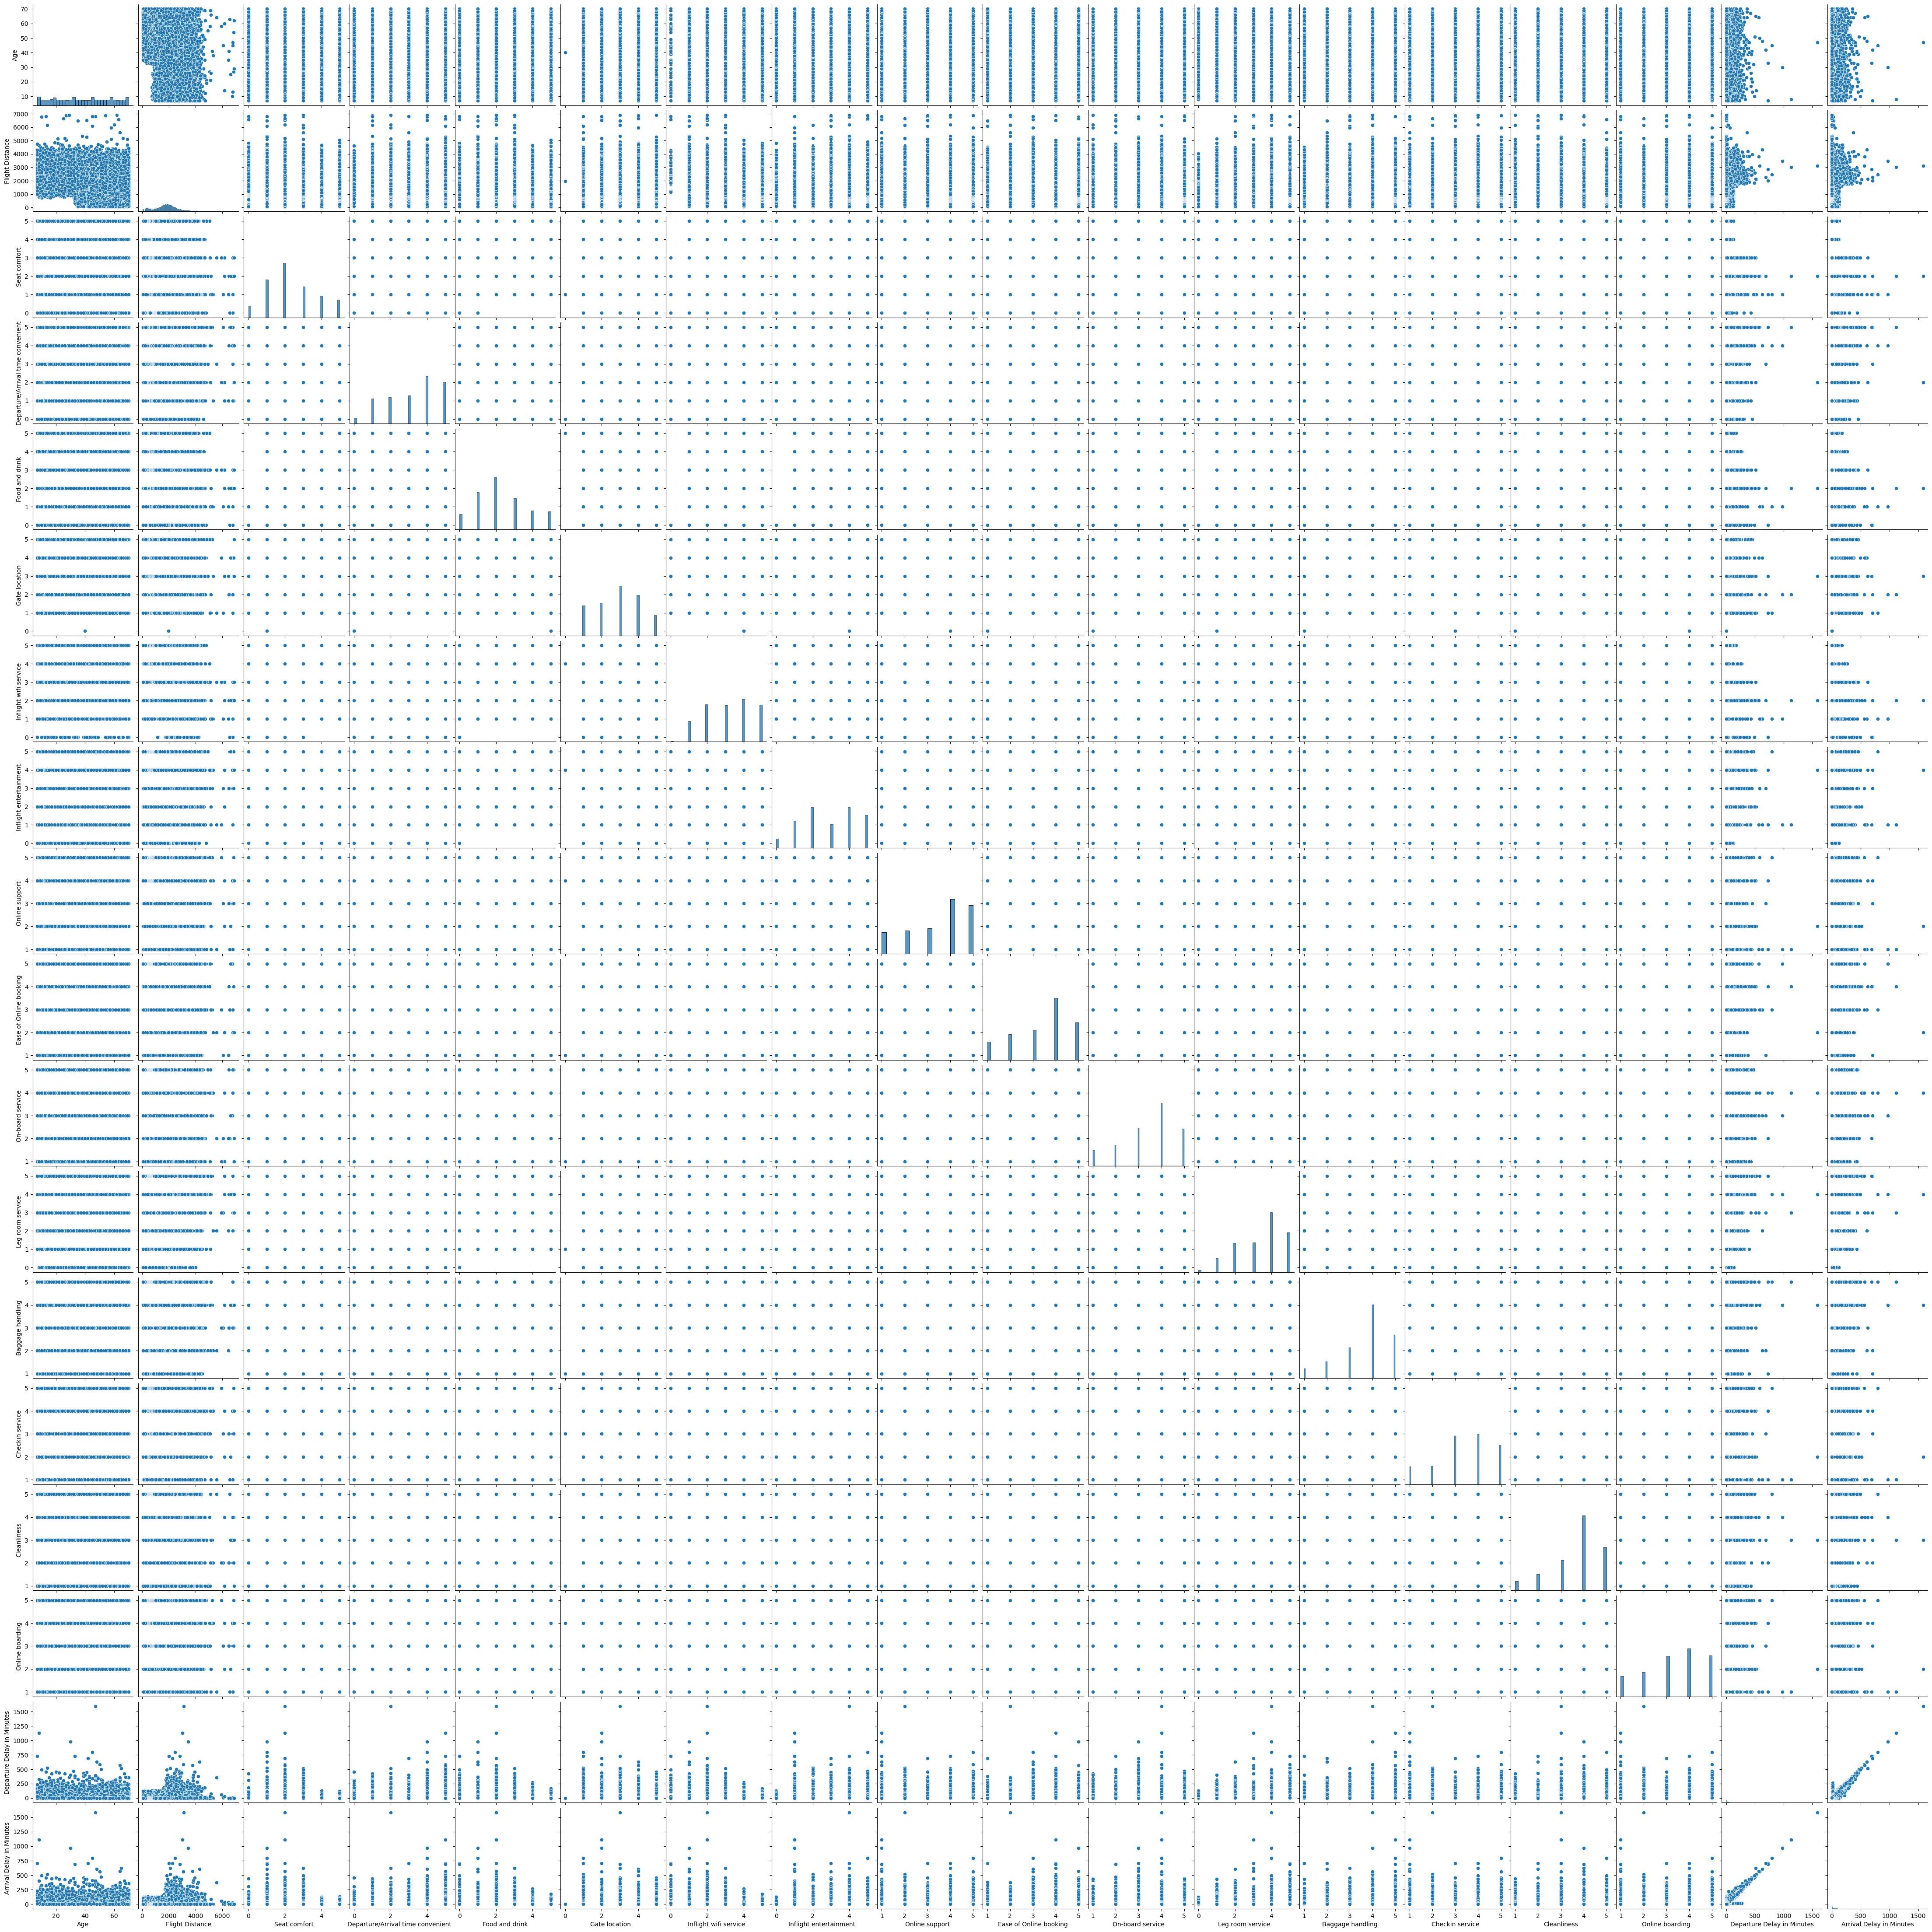

In [24]:
sns.pairplot(df)

# Countplot

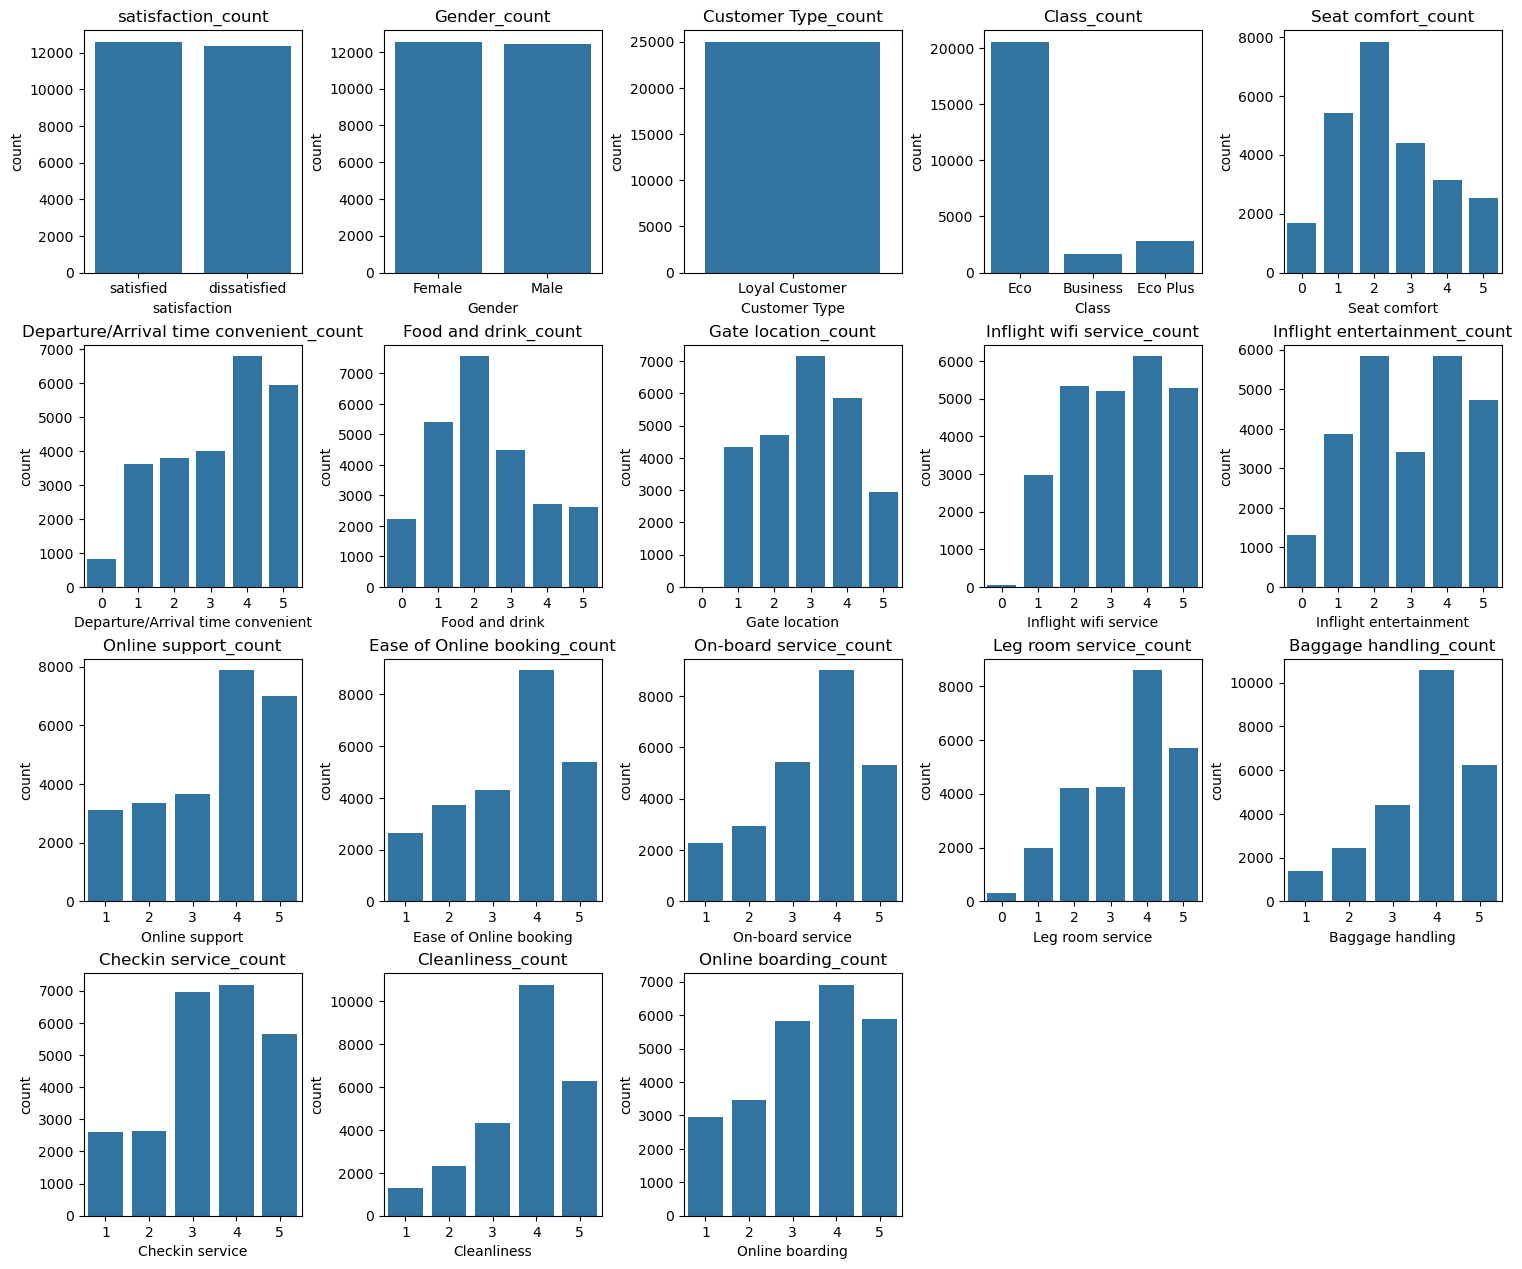

In [25]:
c=['satisfaction','Gender','Customer Type','Class','Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(c)):
  plt.subplot(5,5,i+1)
  sns.countplot(data=df,x=c[i])
  plt.title(c[i]+'_count')
plt.show()

# Pieplot

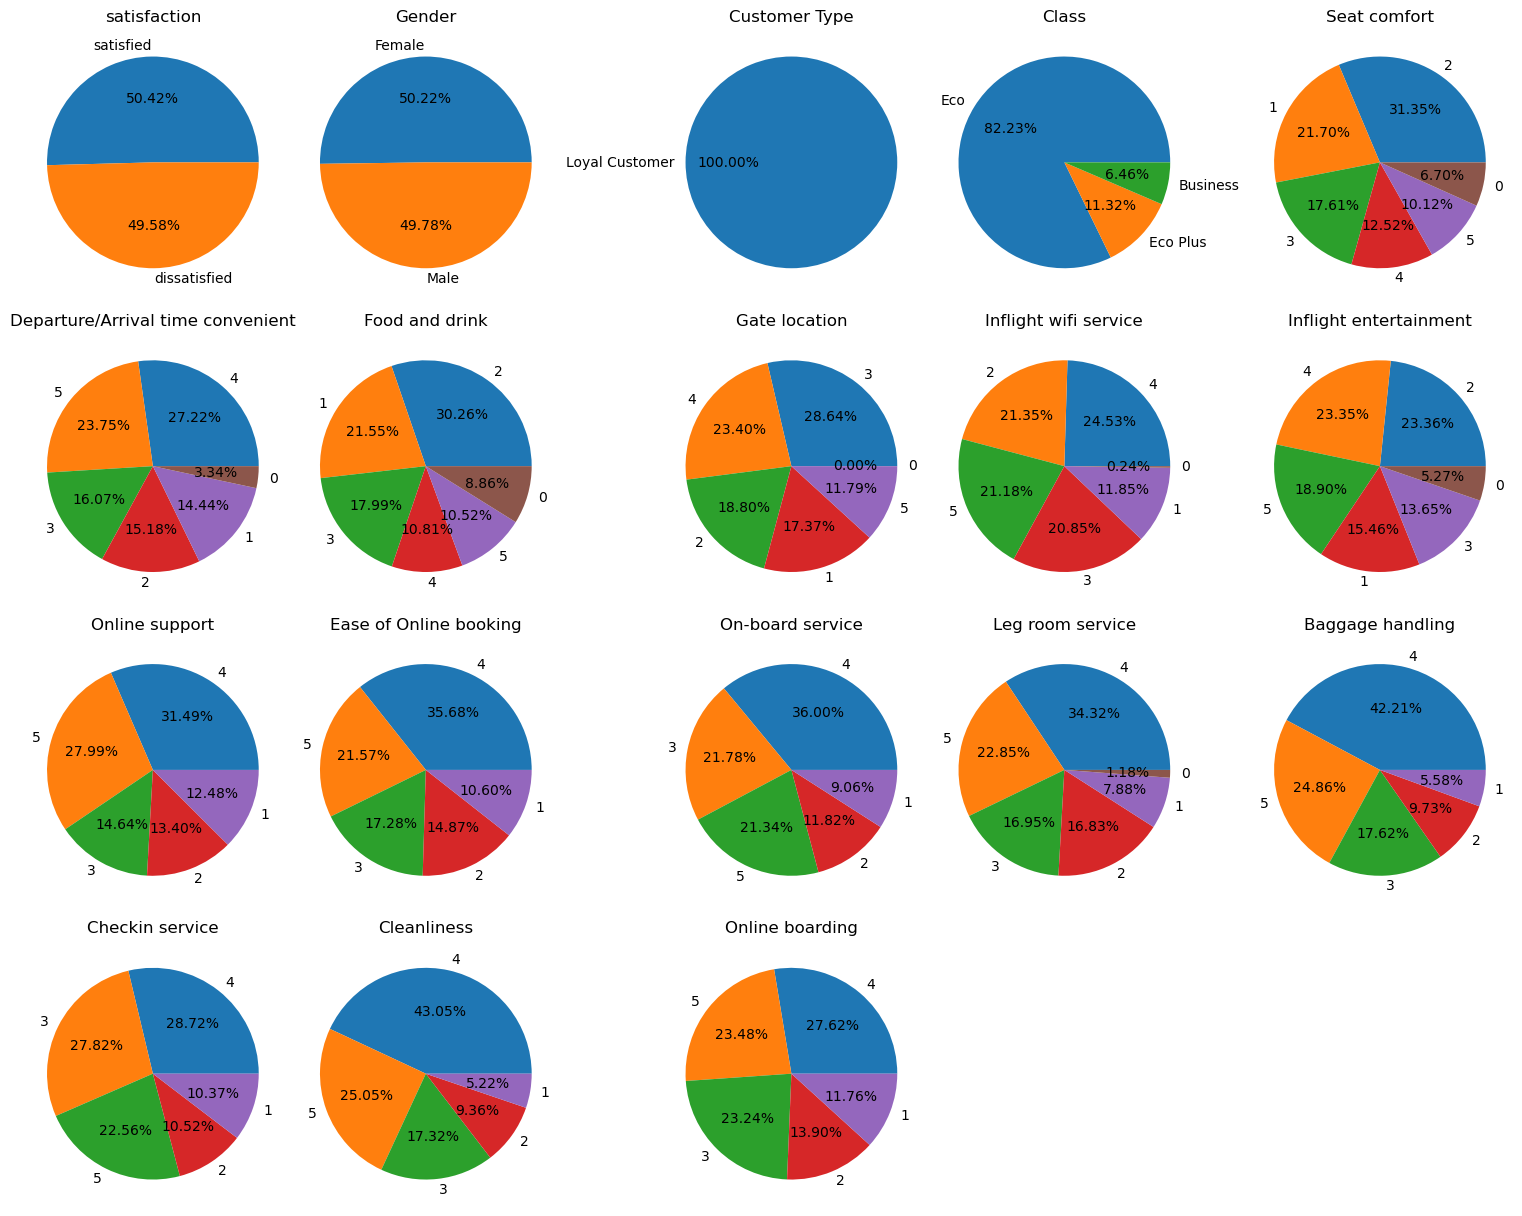

In [26]:
p=['satisfaction','Gender','Customer Type','Class','Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(p)):
      plt.subplot(5,5,i+1)
      a=df[p[i]].value_counts()
      plt.pie(x=a,labels=a.index,autopct='%1.2f%%')
      plt.title(p[i])

# Boxplot

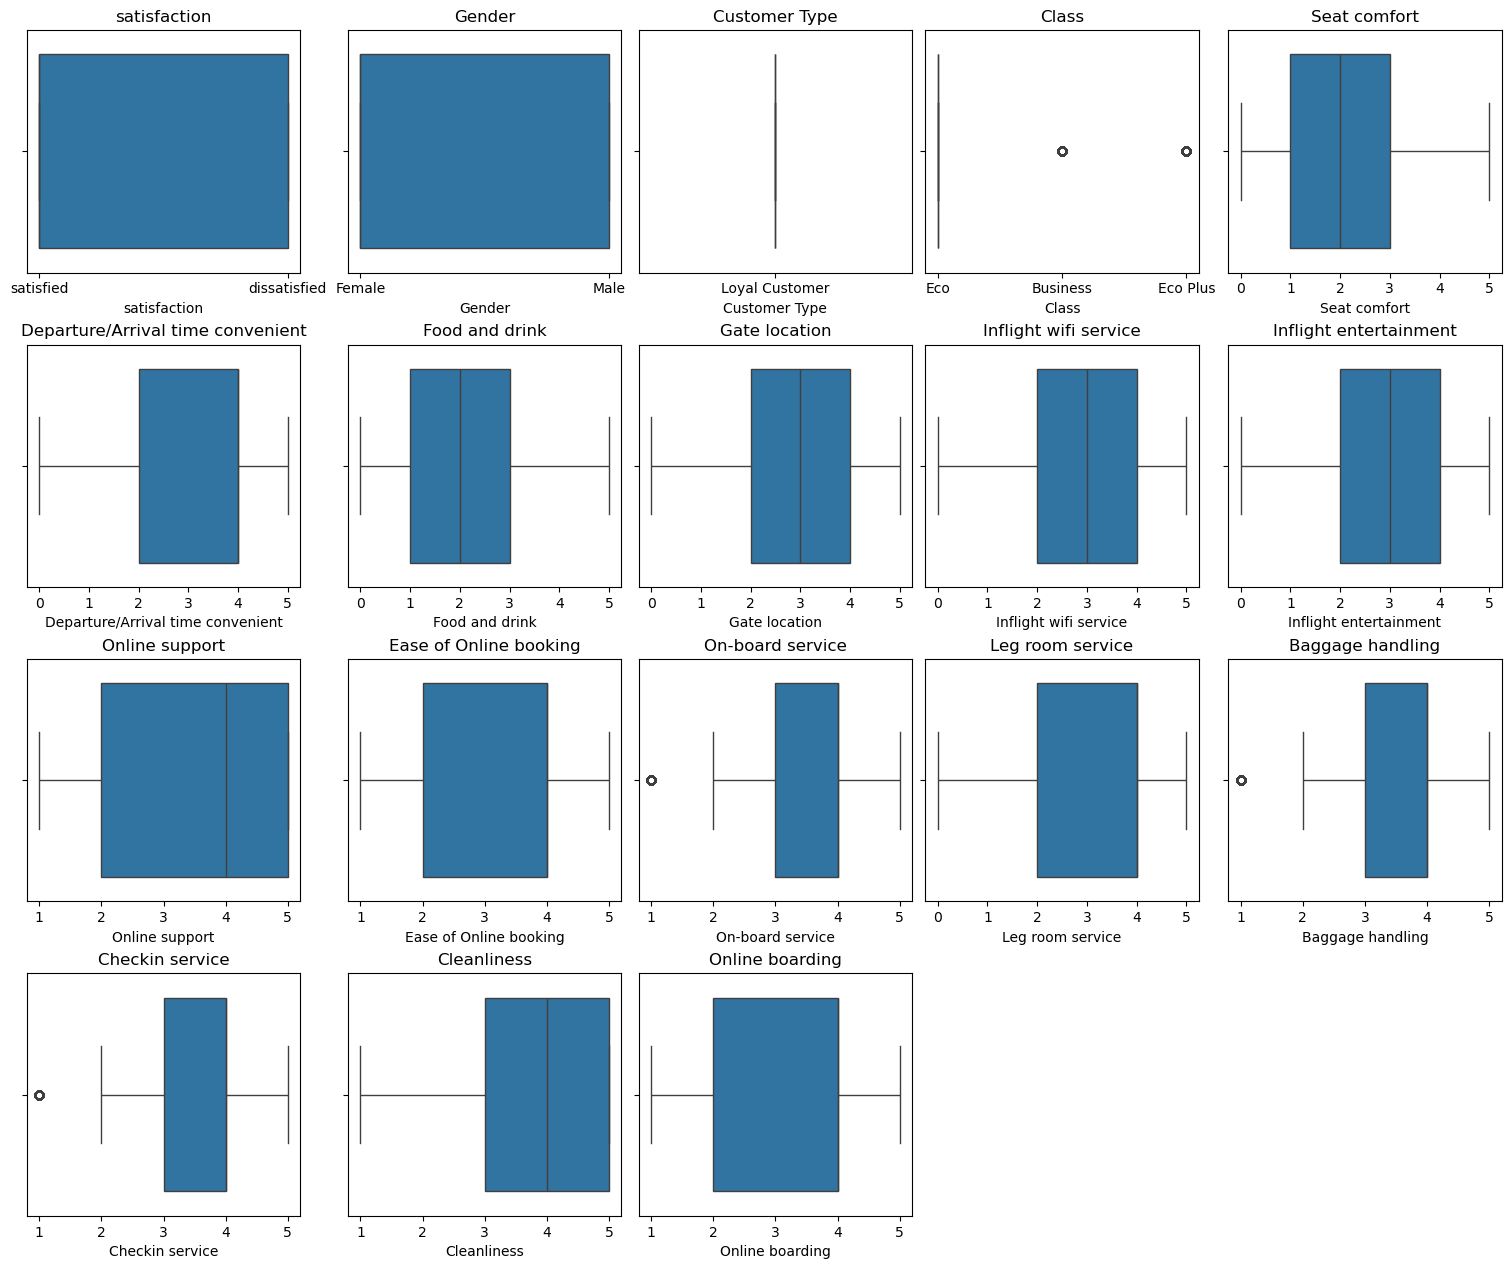

In [27]:
bp=['satisfaction','Gender','Customer Type','Class','Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(bp)):
      plt.subplot(5,5,i+1)
      sns.boxplot(data=df,x=p[i])
      plt.title(bp[i])

# Heatmap

<Axes: >

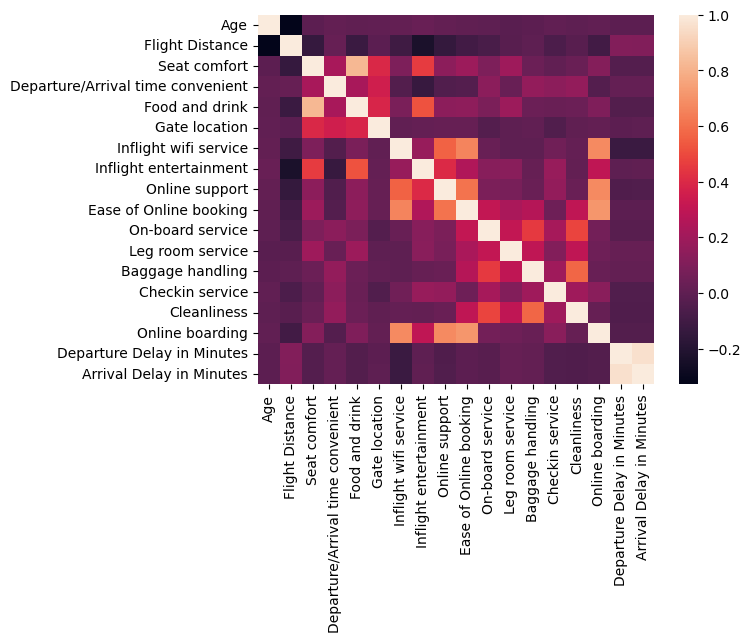

In [28]:
sns.heatmap(df.select_dtypes(['number']).corr())

# Encoding

In [29]:
lb=LabelEncoder()
lb1=LabelEncoder()
df['satisfaction']=lb.fit_transform(df['satisfaction'])
df['Class']=lb1.fit_transform(df['Class'])

In [30]:
df.dtypes

satisfaction                           int32
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                  int32
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [31]:
df.drop(['Age','Customer Type','Type of Travel','Gender','Flight Distance','Departure/Arrival time convenient','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

In [32]:
df.corr()

,satisfaction,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
satisfaction,1.000000,0.004843,0.337698,0.297124,0.033494,0.172374,0.582466,0.343331,0.286202,0.196327,0.192145,0.067354,0.149985,0.072846,0.239477
Class,0.004843,1.000000,0.012910,0.010150,-0.002125,0.003988,-0.046734,-0.018066,0.020596,0.020332,0.059846,0.025197,0.001283,0.036926,-0.003868
Seat comfort,0.337698,0.012910,1.000000,0.822788,0.394144,0.092044,0.456613,0.141403,0.187307,0.093294,0.194638,0.035535,0.005891,0.033940,0.112740
Food and drink,0.297124,0.010150,0.822788,1.000000,0.385378,0.082810,0.521655,0.141185,0.147668,0.089291,0.187396,0.039397,0.029219,0.038124,0.099838
Gate location,0.033494,-0.002125,0.394144,0.385378,1.000000,0.005171,0.015787,0.023002,0.020006,-0.035383,-0.006194,0.007566,-0.045830,0.003140,0.009170
Inflight wifi service,0.172374,0.003988,0.092044,0.082810,0.005171,1.000000,0.169799,0.561258,0.658069,0.026738,-0.002006,-0.005562,0.053820,0.015668,0.677027
Inflight entertainment,0.582466,-0.046734,0.456613,0.521655,0.015787,0.169799,1.000000,0.401605,0.250386,0.124176,0.132590,0.021946,0.172553,0.013277,0.295927
Online support,0.343331,-0.018066,0.141403,0.141185,0.023002,0.561258,0.401605,1.000000,0.608206,0.088295,0.076993,0.030767,0.162529,0.030277,0.677902
Ease of Online booking,0.286202,0.020596,0.187307,0.147668,0.020006,0.658069,0.250386,0.608206,1.000000,0.307655,0.229880,0.264305,0.049691,0.295469,0.710929
On-board service,0.196327,0.020332,0.093294,0.089291,-0.035383,0.026738,0.124176,0.088295,0.307655,1.000000,0.304439,0.450129,0.217931,0.484351,0.060856


# Splitting data

In [34]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [35]:
x.shape

(25000, 14)

In [36]:
y

0        1
1        1
2        1
3        1
4        1
        ..
24995    1
24996    0
24997    0
24998    1
24999    1
Name: satisfaction, Length: 25000, dtype: int32

In [37]:
df

,satisfaction,Class,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,1,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,1,1,0,0,3,2,0,2,2,3,3,4,4,4,2
3,1,1,0,0,3,3,4,3,1,1,0,1,4,1,3
4,1,1,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,3,3,3,2,5,4,5,5,5,5,4,5,4
24996,0,1,3,3,2,1,3,1,1,4,5,3,3,5,1
24997,0,0,3,3,2,3,4,4,4,4,4,5,4,4,4
24998,1,1,2,2,2,5,4,5,5,5,5,5,5,5,5


# Train Test Split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# INITIAL MODELING

# K NEAREST NEIGHBOUR (KNN)

Test accuracy: 0.9576
train accuracy: 0.97965
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2458
           1       0.97      0.94      0.96      2542

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



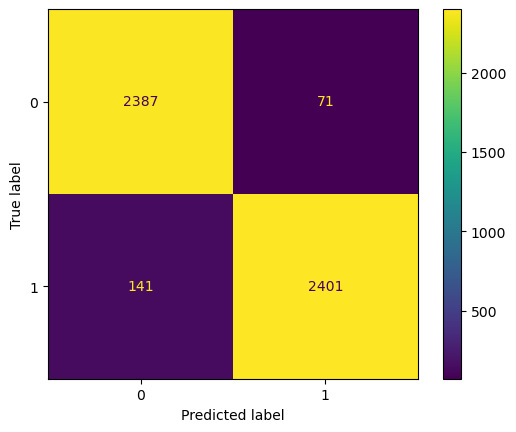

In [42]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ak=accuracy_score(y_test,y_pred)*100

# LOGISTIC REGRESSION

Test accuracy: 0.837
train accuracy: 0.8398
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2458
           1       0.97      0.94      0.96      2542

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



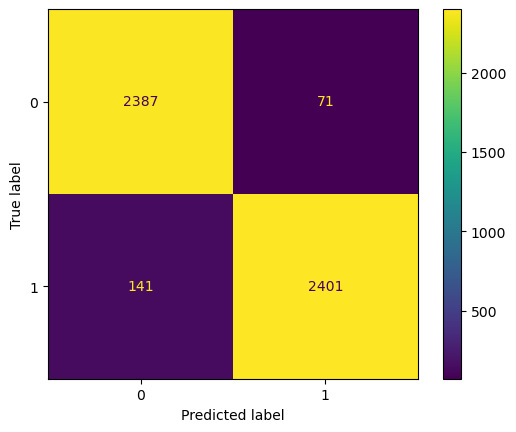

In [44]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
print('Test accuracy:',lg.score(x_test,y_test))
print('train accuracy:',lg.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
alg=accuracy_score(y_test,y_pred)*100

# NAIVE BAYES (GaussianNB)

Test accuracy: 0.8522
train accuracy: 0.8465
CR:               precision    recall  f1-score   support

           0       0.86      0.83      0.85      2458
           1       0.84      0.87      0.86      2542

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



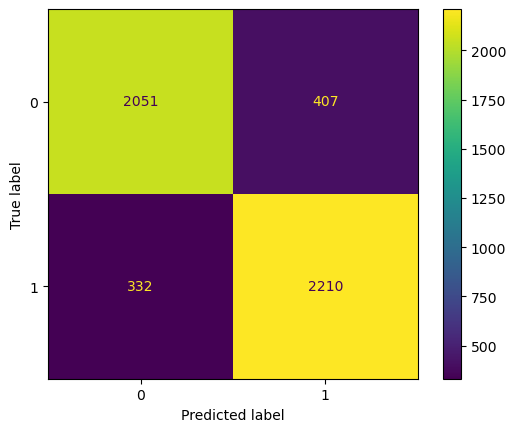

In [46]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agb=accuracy_score(y_test,y_preds)*100

# Ensemble Models

# RANDOMFOREST CLASSIFIER

Test accuracy: 0.9896
train accuracy: 0.99965
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2458
           1       1.00      0.98      0.99      2542

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



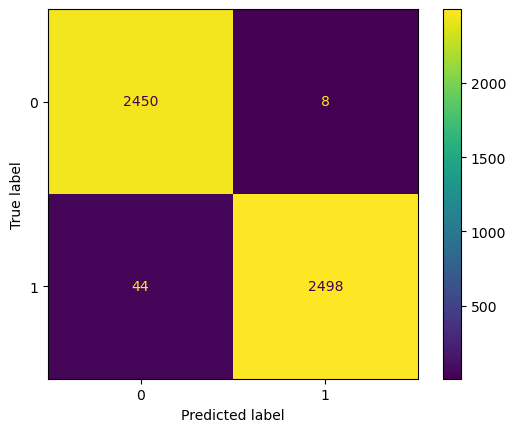

In [49]:
rf=RandomForestClassifier(n_estimators=20,random_state=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
arf=accuracy_score(y_test,y_pred)*100

# ADABOOST CLASSIFIER

Test accuracy: 0.9392
train accuracy: 0.93565
CR:               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2458
           1       0.95      0.93      0.94      2542

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



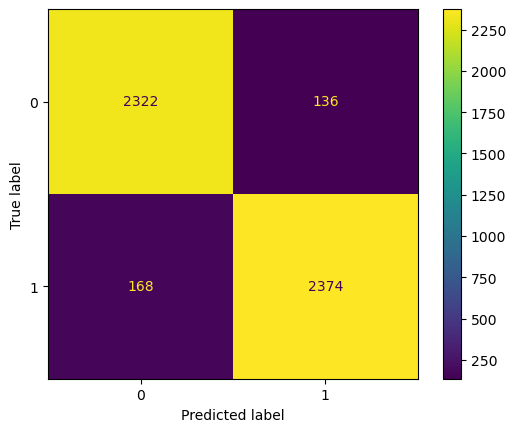

In [51]:
adaboost=AdaBoostClassifier(n_estimators=25,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ab=accuracy_score(y_test,y_pred)*100

# GRADIENTBOOST CLASSIFIER

Test accuracy: 0.9544
train accuracy: 0.95315
CR:               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2458
           1       0.97      0.94      0.95      2542

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



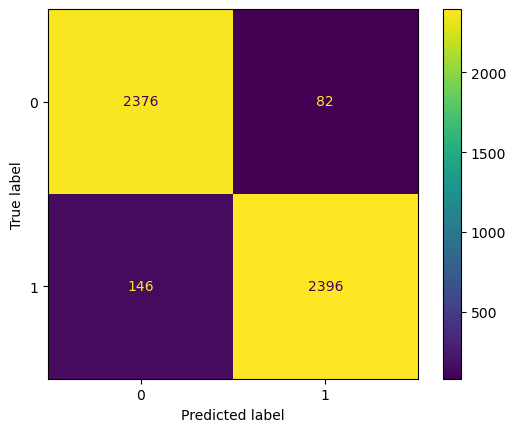

In [53]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agbc=accuracy_score(y_test,y_preds)*100

# DECISION TREE CLASSIFIER

Test accuracy: 0.9824
train accuracy: 0.9998
CR:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2458
           1       0.98      0.98      0.98      2542

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



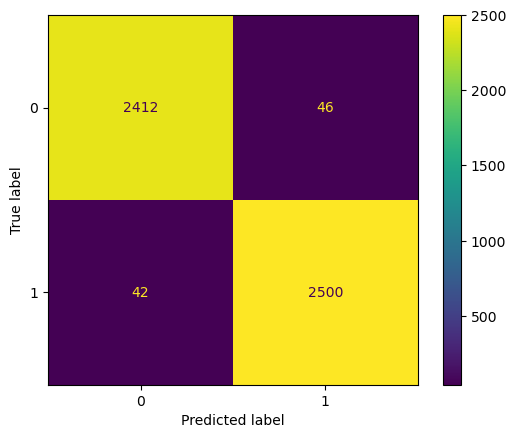

In [58]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=8)
dt.fit(x_train,y_train)
y_predd=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
adt=accuracy_score(y_test,y_predd)*100

In [60]:
tbl=pd.DataFrame()
tbl['model']=pd.Series(['knn','lg','gb','rf','adaboost','gbc','dt'])
tbl['initial accuracy']=pd.Series([ak,alg,agb,arf,ab,agbc,adt])
tbl

,model,initial accuracy
0,knn,95.76
1,lg,95.76
2,gb,85.22
3,rf,98.96
4,adaboost,93.92
5,gbc,95.44
6,dt,98.24


In [62]:
df.value_counts('satisfaction')

satisfaction
1    12606
0    12394
Name: count, dtype: int64

# HYPER PARAMETER TUNING

In [64]:
par={'n_neighbors':[3,7,15,20],'weights':['uniform','distance']}
cls=GridSearchCV(knn,par,cv=10,scoring='accuracy')
cls.fit(x_train,y_train)
print(cls.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


Test accuracy: 0.9896
train accuracy: 0.99965
CR:               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2458
           1       0.95      0.93      0.94      2542

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



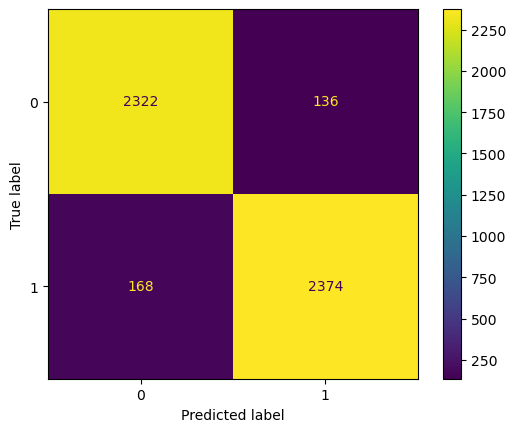

In [65]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
agk=accuracy_score(y_test,y_pred)*100
y_trainpred=knn.predict(x_train)
knnsc=accuracy_score(y_trainpred,y_train)*100

In [66]:
par={'var_smoothing':[1e-10,1e-9,1e-8,1e-7]}
nbt=GridSearchCV(gb,par,cv=10,scoring='accuracy')
nbt.fit(x_train,y_train)
print(nbt.best_params_)

{'var_smoothing': 1e-10}


Test accuracy: 0.8522
train accuracy: 0.8465
CR:               precision    recall  f1-score   support

           0       0.86      0.83      0.85      2458
           1       0.84      0.87      0.86      2542

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



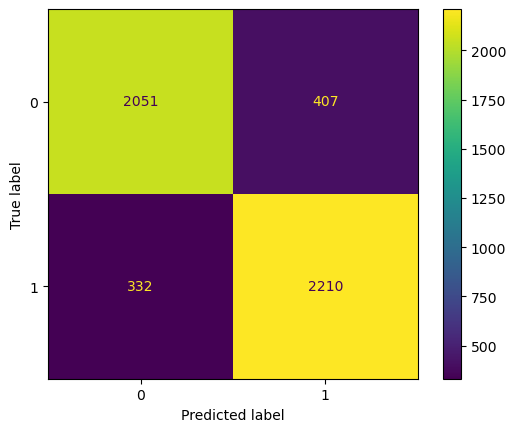

In [67]:
gb=GaussianNB(var_smoothing=1e-10)
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
aghnb=accuracy_score(y_test,y_preds)*100
y_trainpredd=gb.predict(x_train)
gbb=accuracy_score(y_trainpredd,y_train)*100

In [68]:
par={'C':[3,5,10,15],'max_iter':[100,200,300,500],'penalty':['l1','l2']}
plt=GridSearchCV(lg,par,cv=10,scoring='accuracy')
plt.fit(x_train,y_train)
print(plt.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l2'}


Test accuracy: 0.837
train accuracy: 0.8398
CR:               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2458
           1       0.95      0.93      0.94      2542

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



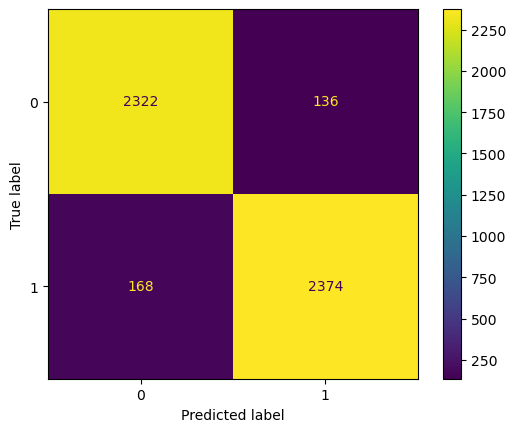

In [69]:
lg=LogisticRegression(C=3,max_iter=100,penalty='l2')
lg.fit(x_train,y_train)
print('Test accuracy:',lg.score(x_test,y_test))
print('train accuracy:',lg.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
algh=accuracy_score(y_test,y_pred)*100
y_trainpreds=lg.predict(x_train)
lgg=accuracy_score(y_trainpreds,y_train)*100

In [70]:
par={'n_estimators':[5,10,15,20,25],'max_features':['sqrt','log2'],'random_state':[1,3,5,10]}
rr=GridSearchCV(rf,par,cv=10,scoring='accuracy')
rr.fit(x_train,y_train) 
print(rr.best_params_)

{'max_features': 'sqrt', 'n_estimators': 25, 'random_state': 5}


Test accuracy: 0.988
train accuracy: 0.99975
CR:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2458
           1       0.99      0.98      0.99      2542

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



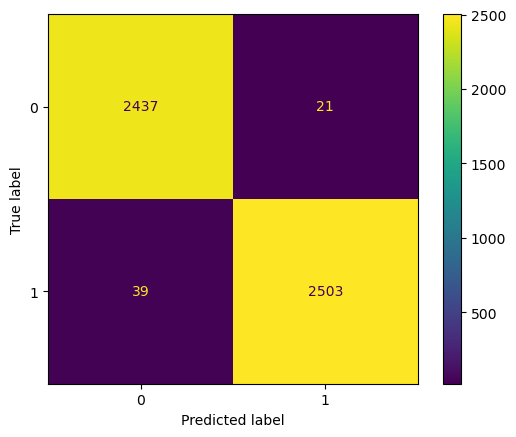

In [71]:
rf=RandomForestClassifier(n_estimators=25,max_features='sqrt',random_state=5)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
arfh=accuracy_score(y_test,y_pred)*100
y_trainspred=rf.predict(x_train)
rff=accuracy_score(y_trainspred,y_train)*100

In [72]:
par={'n_estimators':[5,11,25,30],'learning_rate':[0.05,0.1,0.2],'random_state':[1,3,5,10]}
ad=GridSearchCV(adaboost,par,cv=10,scoring='accuracy')
ad.fit(x_train,y_train)
print(ad.best_params_)

{'learning_rate': 0.2, 'n_estimators': 30, 'random_state': 1}


Test accuracy: 0.942
train accuracy: 0.93815
CR:               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2458
           1       0.95      0.93      0.94      2542

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



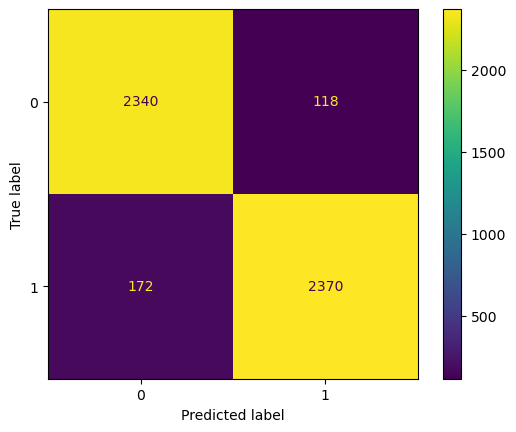

In [73]:
adaboost=AdaBoostClassifier(n_estimators=30,estimator=None,learning_rate=0.2,random_state=1)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
abh=accuracy_score(y_test,y_pred)*100
y_trainpreda=ad.predict(x_train)
add=accuracy_score(y_trainpreda,y_train)*100

In [74]:
par={'n_estimators':[5,10,15,20,25],'learning_rate':[0.05,0.2,0.4,0.1],'max_depth':[3,5,10,20,]}
gg=GridSearchCV(gbc,par,cv=10,scoring='accuracy')
gg.fit(x_train,y_train) 
print(gg.best_params_)

{'learning_rate': 0.4, 'max_depth': 10, 'n_estimators': 25}


Test accuracy: 0.9914
train accuracy: 0.9997
CR:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2458
           1       0.99      0.99      0.99      2542

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



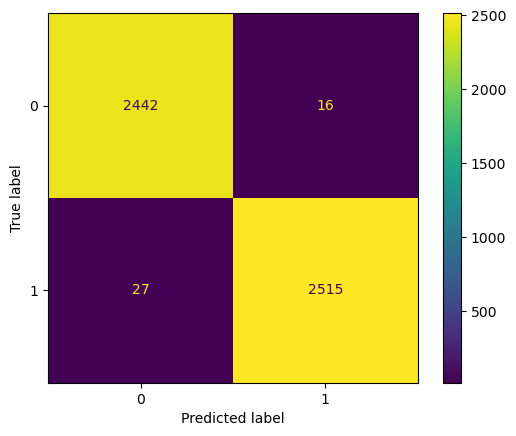

In [80]:
gbc=GradientBoostingClassifier(n_estimators=25,learning_rate=0.4,max_depth=10)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
agbch=accuracy_score(y_test,y_preds)*100
y_trainpreds=gbc.predict(x_train)
gbcc=accuracy_score(y_trainpreds,y_train)*100

In [75]:
par={'criterion':['entropy','gini'],'max_depth':[10,20,50,100],'random_state':[1,33,42,88]}
dtr=GridSearchCV(dt,par,cv=10,scoring='accuracy')
dtr.fit(x_train,y_train)
print(dtr.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'random_state': 88}


Test accuracy: 0.9826
train accuracy: 0.99835
CR:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2458
           1       0.99      0.98      0.98      2542

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



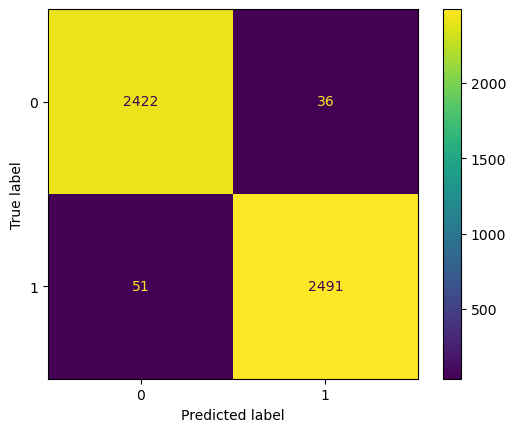

In [76]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=88)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
adth=accuracy_score(y_test,y_pred)*100
y_trainpredt=dt.predict(x_train)
dtt=accuracy_score(y_trainpredt,y_train)*100

In [82]:
tbl=pd.DataFrame()
tbl['model']=pd.Series(['knn','lg','gb','rf','adaboost','gbc','dt'])
tbl['Test Accuracy']=pd.Series([knnsc,gbb,lgg,rff,add,dtt,gbcc])
tbl['Train Accuracy']=pd.Series([agk,aghnb,algh,arfh,abh,adth,agbch])
tbl

,model,Test Accuracy,Train Accuracy
0,knn,99.980,93.92
1,lg,84.650,85.22
2,gb,83.980,93.92
3,rf,99.975,98.80
4,adaboost,93.815,94.20
5,gbc,99.835,98.26
6,dt,99.970,99.14


In [84]:
import joblib
joblib.dump(rf,"model1.pkl")
joblib.dump(lb,"lb.pkl")
joblib.dump(lb1,"lb1.pkl")

['lb1.pkl']

In [86]:
import numpy as np
r=[[1,1,2,0,1,2,3,1,0,2,1,1,2,1]]
rf.predict(r)

array([0])